In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
import numba

In [81]:
R=1
alpha = [np.pi/3, np.pi, np.pi * (3/2)]
upper_bound = 4
lower_bound = -4
dn = [0.04 ,0.02, 0.01]

In [82]:
alpha = 3*np.pi/2
dn = 0.02

In [83]:
x = np.arange(lower_bound, upper_bound, dn)
y = np.arange(lower_bound, upper_bound, dn)
X, Y = np.meshgrid(x,y)
r = np.hypot(X,Y)
# theta = np.arctan2(Y,X)
theta = np.select([Y>0, Y<0] ,[np.arctan2(Y,X), np.arctan2(Y,X)+2*np.pi])
potential = np.zeros(X.shape)
n = potential.shape[0]
print(potential.shape)

# boundary_theta0 = np.logical_and(r<R-dn , (np.round(theta,3))<=dn)
# boundary_theta_alpha = np.logical_and(r<R-dn, np.logical_and((alpha-np.round(theta,3))<=dn, alpha-np.round(theta,3)>0))
# theta_inside= np.logical_and(np.rad2deg(theta)<np.rad2deg(alpha), np.rad2deg(theta)>0)
# boundary_r_R = np.logical_and(theta_inside, np.logical_and(R-r>0, R-r<=dn))
# potential = np.select([boundary_r_R, boundary_theta0, boundary_theta_alpha], 
#                         [10*theta*(alpha-theta),0,0])

boundary = np.logical_and(np.logical_and(np.rad2deg(theta)<=np.rad2deg(alpha), np.rad2deg(theta)>=0), 
                              np.logical_and(R-r>0, R-r<=dn))
potential = np.select([boundary], [np.sin(5*theta*(alpha-theta))])


(400, 400)


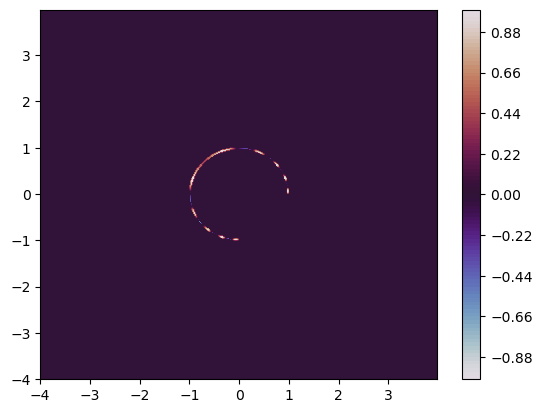

In [84]:
fig = plt.figure()
plt.contourf(X, Y, potential, 100, cmap='twilight')
plt.colorbar()


In [85]:
@numba.jit
def solve(xx, yy, potential):
    mean_before = potential.mean()
    for i in range(n-1):
        for j in range(n-1):
            rr = r[i][j]
            tt = theta[i][j]
            condition = ((rr<=R) and 
                         (np.rad2deg(tt)<=np.rad2deg(alpha)) and 
                         (np.rad2deg(tt)>=0)) or (upper_bound - np.abs(xx[i]) <= dn) or (upper_bound - np.abs(yy[j]) <= dn)
            if not condition:
                potential[i][j] = 1/4 * (potential[i+1][j] + potential[i-1][j] + potential[i][j+1] + potential[i][j-1])
    return potential, potential.mean()-mean_before

In [86]:
max_iter = 10000
err_arr = []

for k in tqdm(range(max_iter)):
    time.sleep(0.1)
    potential_solved, err = solve(x, y, potential)
    err_arr.append(err)

100%|██████████| 10000/10000 [18:14<00:00,  9.13it/s]


Text(0.5, 1.0, 'error as a function of iterations')

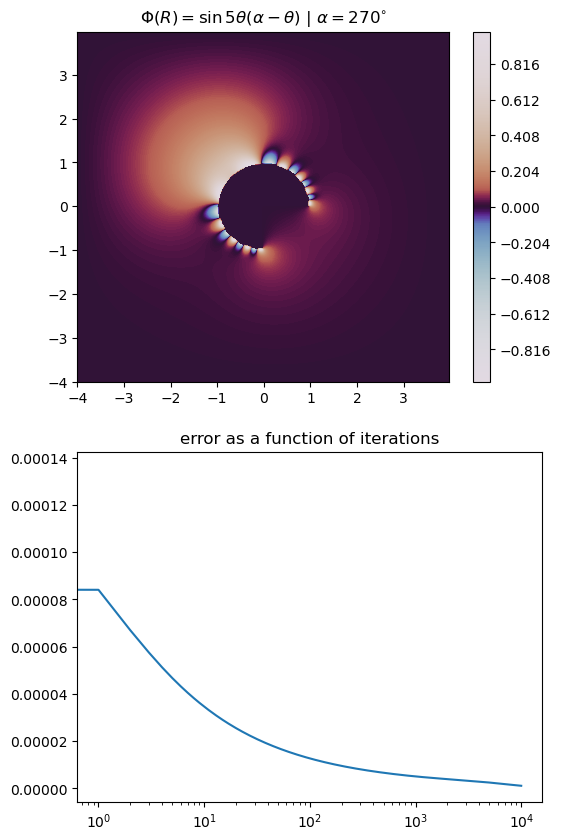

In [92]:
fig , ax = plt.subplots(2,1, figsize=(6,10))

im = ax[0].contourf(X, Y, potential_solved, 500, cmap='twilight' ,norm=mpl.colors.SymLogNorm(0.1))
plt.colorbar(im)
ax[0].set_title(r'$\Phi (R)=\sin{5\theta (\alpha - \theta)}$ | $\alpha =270^{\circ} $')

ax[1].semilogx(np.arange(0, max_iter, 1), err_arr)
ax[1].set_title('error as a function of iterations')
